In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
folder_path = '/content/drive/MyDrive/bigcon/commercial_district_rawdata/'

# seoul_final

## 마곡역 직장인구 imputation
- 작년 데이터 확인
- 면적 확인

In [ ]:
magok = pd.read_csv('/content/drive/MyDrive/bigcon/commercial_district_rawdata/서울시 상권분석서비스(상권-직장인구).csv',encoding='cp949')
magok = magok[magok['상권_코드_명']=='마곡역(마곡)'].iloc[:,:7]
magok = magok.groupby('기준_년월_코드').mean('총_직장_인구_수').reset_index(drop=True)

1.27
1.15

,기준_분기_코드,상권_코드,총_직장_인구_수
0,3.0,2120118.0,523.666667
1,2.5,2120118.0,665.000000
2,1.0,2120118.0,763.000000


## 컬럼 정제 전 null값 어떤식으로 분포하는지 확인

In [ ]:
seoul_final = pd.read_csv('/content/drive/MyDrive/bigcon/commercial_district_rawdata/output/seoul.final.csv')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print(seoul_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 716 entries, 상권_코드_명 to 여성연령대_60_이상_일요일시간대_6_생활인구_수
dtypes: float64(84), int64(617), object(15)
memory usage: 2.5+ MB
None


In [ ]:
seoul_final.isnull().sum()

상권_코드_명                          0
기준_분기_코드                         0
점포_수                             0
유사_업종_점포_수                       0
개업_점포_수                          0
폐업_점포_수                          0
프랜차이즈_점포_수                       0
개업_율                             0
폐업_율                             0
주중_매출_비율                         0
주말_매출_비율                         0
월요일_매출_비율                        0
화요일_매출_비율                        0
수요일_매출_비율                        0
목요일_매출_비율                        0
금요일_매출_비율                        0
토요일_매출_비율                        0
일요일_매출_비율                        0
시간대_00~06_매출_비율                  0
시간대_06~11_매출_비율                  0
시간대_11~14_매출_비율                  0
시간대_14~17_매출_비율                  0
시간대_17~21_매출_비율                  0
시간대_21~24_매출_비율                  0
남성_매출_비율                         0
여성_매출_비율                         0
연령대_10_매출_비율                     0
연령대_20_매출_비율                     0
연령대_30_매출_비율        

# 소득소비 파일 불러오기

In [ ]:
소득소비 = pd.read_csv(folder_path+'NcmCnsmp.csv')

In [ ]:
소득소비 = 소득소비[소득소비['year']==2022].iloc[:,1:].reset_index(drop=True)
소득소비

,trdar_cd,year,quarter,mt_avrg_income_amt,income_sctn_cd,expndtr_totamt,fdstffs_expndtr_totamt,clths_ftwr_expndtr_totamt,lvspl_expndtr_totamt,mcp_expndtr_totamt,trnsport_expndtr_totamt,lsr_expndtr_totamt,cltur_expndtr_totamt,edc_expndtr_totamt,plesr_expndtr_totamt
0,2120098,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
1,2120098,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
2,2120098,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
3,2120098,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
4,2120234,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2120103,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
448,2120120,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
449,2120120,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
450,2120120,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557


In [ ]:
소득소비.to_csv(folder_path+'소득소비.csv',index=False)

In [ ]:
소득소비.columns

Index(['trdar_cd', 'year', 'quarter', 'mt_avrg_income_amt', 'income_sctn_cd',
       'expndtr_totamt', 'fdstffs_expndtr_totamt', 'clths_ftwr_expndtr_totamt',
       'lvspl_expndtr_totamt', 'mcp_expndtr_totamt', 'trnsport_expndtr_totamt',
       'lsr_expndtr_totamt', 'cltur_expndtr_totamt', 'edc_expndtr_totamt',
       'plesr_expndtr_totamt'],
      dtype='object')

In [ ]:
columns1 = ['상권_코드','기준_년_코드','기준_분기_코드','월_평균_소득_금액','소득_구간_코드','지출_총금액',
            '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
            '여가_지출_총금액','문화_지출_총금액','교육_지출_총금액','유흥_지출_총금액']

In [ ]:
len(소득소비.columns) == len(columns1)

True

In [ ]:
소득소비.columns = columns1

In [ ]:
소득소비

,상권_코드,기준_년_코드,기준_분기_코드,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,2120098,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
1,2120098,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
2,2120098,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
3,2120098,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
4,2120234,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2120103,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
448,2120120,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
449,2120120,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
450,2120120,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557


# mapping 후 merge

In [ ]:
datasheet = pd.read_excel('/content/drive/MyDrive/bigcon/commercial_district_rawdata/2023빅콘테스트_데이터신기술분야_데이터정의서.xlsx',sheet_name=2).iloc[2:,:]

In [ ]:
datasheet.rename(columns={'한국신용데이터-상권목록':'상권_코드_명','Unnamed: 1':'상권_코드'},inplace=True)
datasheet.reset_index(drop=True,inplace=True)
datasheet

,상권_코드_명,상권_코드
0,DMC(디지털미디어시티),2120098
1,가락시장역,2120234
2,가로수길,2120186
3,가산디지털단지,2120131
4,강남구청역,2120203
...,...,...
108,해방촌 남동측,2110081
109,홍대 걷고싶은 거리,2130191
110,홍대입구역 3번,2110564
111,홍대입구역(홍대),2120103


In [ ]:
datasheet

,상권_코드_명,상권_코드
0,DMC(디지털미디어시티),2120098
1,가락시장역,2120234
2,가로수길,2120186
3,가산디지털단지,2120131
4,강남구청역,2120203
...,...,...
108,해방촌 남동측,2110081
109,홍대 걷고싶은 거리,2130191
110,홍대입구역 3번,2110564
111,홍대입구역(홍대),2120103


In [ ]:
소득소비_to_merge = pd.merge(소득소비, datasheet, on = ['상권_코드'], how='outer')
소득소비_to_merge

,상권_코드,기준_년_코드,기준_분기_코드,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,상권_코드_명
0,2120098,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,DMC(디지털미디어시티)
1,2120098,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,DMC(디지털미디어시티)
2,2120098,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,DMC(디지털미디어시티)
3,2120098,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,DMC(디지털미디어시티)
4,2120234,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,가락시장역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2120103,2022,4,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,홍대입구역(홍대)
448,2120120,2022,1,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,화곡역
449,2120120,2022,2,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,화곡역
450,2120120,2022,3,4305934,8,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557,화곡역


In [ ]:
소득소비_to_merge.to_csv(folder_path+'소득소비.csv',index=False)

In [ ]:
seoul_final

,기준_년_코드,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,...,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,...,5173771025,9476101888,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,...,6381971106,11415878572,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,...,6785138058,11629832557,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,...,6628895513,11291122388,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,...,2938996204,5347283018,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2022,4,홍대입구역(홍대),2766,2979,0.033623,0.030369,92392017749,57218258558,61544900016,...,66830472133,35151231846,17740715097,13917942103,4185514344,91,22,4789,9580.0,3897068
448,2022,3,화곡역,535,627,0.016822,0.029907,25512611649,7832439156,16299965539,...,6305498996,7729126559,6975450949,5885671302,5776254401,88,16,2748,927.0,1163547
449,2022,1,화곡역,540,636,0.024074,0.016667,23115288238,7259401338,14549570812,...,5671951299,7456218799,6093983322,5310181908,5210055110,88,16,2748,927.0,1102013
450,2022,2,화곡역,541,634,0.036969,0.038817,25228502516,8653350438,16377297636,...,6667083550,8059595780,7460624555,5578093316,5393266676,88,16,2748,927.0,1168431


In [ ]:
final = pd.merge(seoul_final, 소득소비_to_merge, on = ['상권_코드_명','기준_분기_코드'], how='outer')
final

,기준_년_코드_x,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,...,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2022,4,홍대입구역(홍대),2766,2979,0.033623,0.030369,92392017749,57218258558,61544900016,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
448,2022,3,화곡역,535,627,0.016822,0.029907,25512611649,7832439156,16299965539,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
449,2022,1,화곡역,540,636,0.024074,0.016667,23115288238,7259401338,14549570812,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
450,2022,2,화곡역,541,634,0.036969,0.038817,25228502516,8653350438,16377297636,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557


In [ ]:
final.to_csv(folder_path+'seoul_final.csv',index=False)

In [ ]:
final = pd.read_csv(folder_path+'seoul_final.csv')
final

,기준_년_코드_x,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,...,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2022,4,홍대입구역(홍대),2766,2979,0.033623,0.030369,92392017749,57218258558,61544900016,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
448,2022,3,화곡역,535,627,0.016822,0.029907,25512611649,7832439156,16299965539,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
449,2022,1,화곡역,540,636,0.024074,0.016667,23115288238,7259401338,14549570812,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557
450,2022,2,화곡역,541,634,0.036969,0.038817,25228502516,8653350438,16377297636,...,520427635,129126028,64853632,37122367,65974602,88343761,22223650,14656697,76185341,21941557


In [ ]:
final.columns

Index(['기준_년_코드_x', '기준_분기_코드', '상권_코드_명', '점포_수', '유사_업종_점포_수', '개업_율',
       '폐업_율', '주중_매출_금액', '주말_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '집객시설_수', '교통_인프라', '총 상주인구 수', '총_직장_인구_수',
       '총_생활인구_수', '상권_코드', '기준_년_코드_y', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액',
       '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
       '여가_지출_총금액', '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액'],
      dtype='object')

In [ ]:
final2 = final.iloc[:,:25]
final2.drop(columns=['기준_년_코드_y'],inplace=True)
final2.rename(columns={'기준_년_코드_x':'기준_년_코드'},inplace=True)
final2

,기준_년_코드,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,상권_코드,월_평균_소득_금액
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,...,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,2120098,4305934
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,...,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,2120098,4305934
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,...,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,2120098,4305934
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,...,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,2120098,4305934
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,...,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,2120234,4305934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,2022,4,홍대입구역(홍대),2766,2979,0.033623,0.030369,92392017749,57218258558,61544900016,...,17740715097,13917942103,4185514344,91,22,4789,9580.0,3897068,2120103,4305934
448,2022,3,화곡역,535,627,0.016822,0.029907,25512611649,7832439156,16299965539,...,6975450949,5885671302,5776254401,88,16,2748,927.0,1163547,2120120,4305934
449,2022,1,화곡역,540,636,0.024074,0.016667,23115288238,7259401338,14549570812,...,6093983322,5310181908,5210055110,88,16,2748,927.0,1102013,2120120,4305934
450,2022,2,화곡역,541,634,0.036969,0.038817,25228502516,8653350438,16377297636,...,7460624555,5578093316,5393266676,88,16,2748,927.0,1168431,2120120,4305934


In [ ]:
final2.to_csv(folder_path+'seoul_final.csv',index=False)

In [ ]:
final2.to_csv('seoul_final.csv',index=False)

# 선정된 컬럼과 null값 imputation
- 소득소비까지 포함되고 컬럼 정제된 seoul_final 활용

In [ ]:
seoul_final = pd.read_csv(folder_path + 'seoul_final.csv')
seoul_final

,기준_년_코드,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,상권_코드,월_평균_소득_금액
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,14875440925,134898169,5173771025,9476101888,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,2120098,4305934
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,17558584067,168970007,6381971106,11415878572,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,2120098,4305934
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,17775131249,166592951,6785138058,11629832557,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,2120098,4305934
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,17577661120,189166762,6628895513,11291122388,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,2120098,4305934
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,13812371222,105286690,2938996204,5347283018,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,2120234,4305934
5,2022,2,가락시장역,1092,1194,0.021062,0.019231,30903542927,9195145108,19797454345,15974674678,118118454,3633237787,7019033808,7640281007,9215548097,8145909869,62,3,2694,10268.0,1490392,2120234,4305934
6,2022,3,가락시장역,1088,1184,0.023897,0.035846,30722888176,8511222836,20379879758,14125912438,159558077,3757183847,7274699737,7362371634,7418208631,8533770275,62,3,2694,10268.0,1522873,2120234,4305934
7,2022,4,가락시장역,1086,1182,0.020258,0.021179,30155716171,9365312696,21227658544,13310779137,124756568,3824020084,7088088582,8470708315,7657422983,7373441158,62,3,2694,10268.0,1613064,2120234,4305934
8,2022,1,가로수길,1568,1667,0.023597,0.013393,68339311855,33033571865,38228809264,56213906313,1205320273,28303132278,26454312825,16364059118,14953117316,7162773727,42,3,3152,6518.0,1977135,2120186,4305934
9,2022,2,가로수길,1563,1659,0.024312,0.023672,84946983429,41505531520,44597930357,71750960330,1156138580,34287642778,32352094039,21278352329,16823170550,10451492394,42,3,3152,6518.0,2273038,2120186,4305934


In [ ]:
seoul_final.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '폐업_율',
       '주중_매출_금액', '주말_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '집객시설_수', '교통_인프라', '총 상주인구 수', '총_직장_인구_수',
       '총_생활인구_수', '상권_코드', '월_평균_소득_금액'],
      dtype='object')

In [ ]:
seoul_final.isnull().sum()

기준_년_코드            0
기준_분기_코드           0
상권_코드_명            0
점포_수               0
유사_업종_점포_수         0
개업_율               0
폐업_율               0
주중_매출_금액           0
주말_매출_금액           0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
집객시설_수             0
교통_인프라             0
총 상주인구 수           0
총_직장_인구_수          4
총_생활인구_수           0
상권_코드              0
월_평균_소득_금액         0
dtype: int64

In [ ]:
seoul_final.groupby('기준_분기_코드')['총_직장_인구_수'].describe()

,count,mean,std,min,25%,50%,75%,max
기준_분기_코드,,,,,,,,
1,112.0,9892.3125,16167.423218,13.0,1115.75,3777.5,10345.25,81100.0
2,112.0,9892.3125,16167.423218,13.0,1115.75,3777.5,10345.25,81100.0
3,112.0,9892.3125,16167.423218,13.0,1115.75,3777.5,10345.25,81100.0
4,112.0,9892.3125,16167.423218,13.0,1115.75,3777.5,10345.25,81100.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*arg

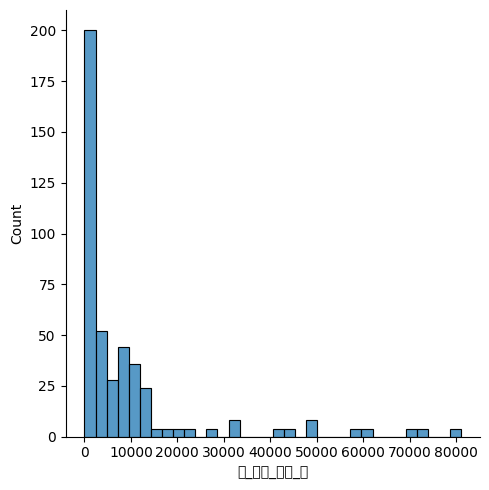

In [ ]:
import seaborn as sns

sns.displot(seoul_final['총_직장_인구_수'])

In [ ]:
seoul_final['총_직장_인구_수'].describe()

count      448.000000
mean      9892.312500
std      16113.078784
min         13.000000
25%       1115.750000
50%       3777.500000
75%      10345.250000
max      81100.000000
Name: 총_직장_인구_수, dtype: float64

In [ ]:
seoul_final.iloc[136:140,20]=763

In [ ]:
seoul_final[seoul_final.isnull().any(axis=1)]

,기준_년_코드,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,상권_코드,월_평균_소득_금액


In [ ]:
seoul_final

,기준_년_코드,기준_분기_코드,상권_코드_명,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,상권_코드,월_평균_소득_금액
0,2022,1,DMC(디지털미디어시티),606,766,0.031353,0.016502,37382867518,4965199863,16942804624,14875440925,134898169,5173771025,9476101888,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,2120098,4305934
1,2022,2,DMC(디지털미디어시티),608,768,0.042763,0.032895,44571825145,6419369163,19731335895,17558584067,168970007,6381971106,11415878572,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,2120098,4305934
2,2022,3,DMC(디지털미디어시티),616,774,0.035714,0.027597,45385927882,6105428418,19802444629,17775131249,166592951,6785138058,11629832557,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,2120098,4305934
3,2022,4,DMC(디지털미디어시티),620,778,0.041935,0.037097,45085782411,6797770801,19623759597,17577661120,189166762,6628895513,11291122388,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,2120098,4305934
4,2022,1,가락시장역,1098,1203,0.016393,0.022769,26990791235,6976589934,16621976320,13812371222,105286690,2938996204,5347283018,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,2120234,4305934
5,2022,2,가락시장역,1092,1194,0.021062,0.019231,30903542927,9195145108,19797454345,15974674678,118118454,3633237787,7019033808,7640281007,9215548097,8145909869,62,3,2694,10268.0,1490392,2120234,4305934
6,2022,3,가락시장역,1088,1184,0.023897,0.035846,30722888176,8511222836,20379879758,14125912438,159558077,3757183847,7274699737,7362371634,7418208631,8533770275,62,3,2694,10268.0,1522873,2120234,4305934
7,2022,4,가락시장역,1086,1182,0.020258,0.021179,30155716171,9365312696,21227658544,13310779137,124756568,3824020084,7088088582,8470708315,7657422983,7373441158,62,3,2694,10268.0,1613064,2120234,4305934
8,2022,1,가로수길,1568,1667,0.023597,0.013393,68339311855,33033571865,38228809264,56213906313,1205320273,28303132278,26454312825,16364059118,14953117316,7162773727,42,3,3152,6518.0,1977135,2120186,4305934
9,2022,2,가로수길,1563,1659,0.024312,0.023672,84946983429,41505531520,44597930357,71750960330,1156138580,34287642778,32352094039,21278352329,16823170550,10451492394,42,3,3152,6518.0,2273038,2120186,4305934


In [ ]:
seoul_final.to_csv('seoul_final.csv',index=False)

# 추정매출 데이터 다시

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bigcon/commercial_district_rawdata/서울시 상권분석서비스(상권-추정매출).csv',encoding='cp949')

In [ ]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [ ]:
df2 = df[['기준_년_코드', '기준_분기_코드','상권_코드_명','주중_매출_비율', '주말_매출_비율', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율']]

In [ ]:
df2['연령대_1020_매출_비율'] = df2['연령대_10_매출_비율'] + df2['연령대_20_매출_비율']
df2['연령대_3040_매출_비율'] = df2['연령대_30_매출_비율'] + df2['연령대_40_매출_비율']
df2['연령대_5060_매출_비율'] = df2['연령대_50_매출_비율'] + df2['연령대_60_이상_매출_비율']
df2.drop(labels=['연령대_10_매출_비율','연령대_20_매출_비율','연령대_30_매출_비율','연령대_40_매출_비율','연령대_50_매출_비율','연령대_60_이상_매출_비율'],axis=1,inplace=True)
df2

<ipython-input-17-f10df0ee26bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연령대_1020_매출_비율'] = df2['연령대_10_매출_비율'] + df2['연령대_20_매출_비율']
<ipython-input-17-f10df0ee26bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연령대_3040_매출_비율'] = df2['연령대_30_매출_비율'] + df2['연령대_40_매출_비율']
<ipython-input-17-f10df0ee26bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,기준_년_코드,기준_분기_코드,상권_코드_명,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율
0,2022,4,강남 마이스 관광특구,55,45,3,97,83,12,4
1,2022,4,강남 마이스 관광특구,69,31,59,41,22,57,22
2,2022,4,강남 마이스 관광특구,64,36,42,59,3,26,72
3,2022,4,강남 마이스 관광특구,79,21,58,42,17,55,28
4,2022,4,강남 마이스 관광특구,45,56,63,37,34,63,3
...,...,...,...,...,...,...,...,...,...,...
136815,2022,1,이북5도청사,100,0,73,27,0,86,15
136816,2022,1,이북5도청사,67,33,47,53,19,36,46
136817,2022,1,이북5도청사,40,60,81,19,0,28,73
136818,2022,1,이북5도청사,49,52,56,44,3,36,62


In [ ]:
df2

,기준_년_코드,기준_분기_코드,상권_코드_명,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율
0,2022,4,강남 마이스 관광특구,55,45,3,97,83,12,4
1,2022,4,강남 마이스 관광특구,69,31,59,41,22,57,22
2,2022,4,강남 마이스 관광특구,64,36,42,59,3,26,72
3,2022,4,강남 마이스 관광특구,79,21,58,42,17,55,28
4,2022,4,강남 마이스 관광특구,45,56,63,37,34,63,3
...,...,...,...,...,...,...,...,...,...,...
136815,2022,1,이북5도청사,100,0,73,27,0,86,15
136816,2022,1,이북5도청사,67,33,47,53,19,36,46
136817,2022,1,이북5도청사,40,60,81,19,0,28,73
136818,2022,1,이북5도청사,49,52,56,44,3,36,62


In [ ]:
df3 = pd.read_csv(folder_path+'SEOUL.csv')

In [ ]:
df3

,상권_코드_명,상권_코드,기준_년_코드,기준_분기_코드,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
0,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,3567709.0,0.150943
1,DMC(디지털미디어시티),2120098,2022,2,608,768,0.042763,0.032895,44571825145,6419369163,...,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,3567709.0,0.207547
2,DMC(디지털미디어시티),2120098,2022,3,616,774,0.035714,0.027597,45385927882,6105428418,...,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,3567709.0,0.142857
3,DMC(디지털미디어시티),2120098,2022,4,620,778,0.041935,0.037097,45085782411,6797770801,...,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,3567709.0,0.291667
4,가락시장역,2120234,2022,1,1098,1203,0.016393,0.022769,26990791235,6976589934,...,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,3494644.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,홍대입구역(홍대),2120103,2022,4,2766,2979,0.033623,0.030369,92392017749,57218258558,...,17740715097,13917942103,4185514344,91,22,4789,9580.0,3897068,2934520.0,0.189474
448,화곡역,2120120,2022,1,540,636,0.024074,0.016667,23115288238,7259401338,...,6093983322,5310181908,5210055110,88,16,2748,927.0,1102013,2624496.0,0.166667
449,화곡역,2120120,2022,2,541,634,0.036969,0.038817,25228502516,8653350438,...,7460624555,5578093316,5393266676,88,16,2748,927.0,1168431,2624496.0,0.473684
450,화곡역,2120120,2022,3,535,627,0.016822,0.029907,25512611649,7832439156,...,6975450949,5885671302,5776254401,88,16,2748,927.0,1163547,2624496.0,0.380952


In [ ]:
df3

,상권_코드_명,상권_코드,기준_년_코드,기준_분기_코드,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
0,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,3567709.0,0.150943
1,DMC(디지털미디어시티),2120098,2022,2,608,768,0.042763,0.032895,44571825145,6419369163,...,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,3567709.0,0.207547
2,DMC(디지털미디어시티),2120098,2022,3,616,774,0.035714,0.027597,45385927882,6105428418,...,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,3567709.0,0.142857
3,DMC(디지털미디어시티),2120098,2022,4,620,778,0.041935,0.037097,45085782411,6797770801,...,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,3567709.0,0.291667
4,가락시장역,2120234,2022,1,1098,1203,0.016393,0.022769,26990791235,6976589934,...,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,3494644.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,홍대입구역(홍대),2120103,2022,4,2766,2979,0.033623,0.030369,92392017749,57218258558,...,17740715097,13917942103,4185514344,91,22,4789,9580.0,3897068,2934520.0,0.189474
448,화곡역,2120120,2022,1,540,636,0.024074,0.016667,23115288238,7259401338,...,6093983322,5310181908,5210055110,88,16,2748,927.0,1102013,2624496.0,0.166667
449,화곡역,2120120,2022,2,541,634,0.036969,0.038817,25228502516,8653350438,...,7460624555,5578093316,5393266676,88,16,2748,927.0,1168431,2624496.0,0.473684
450,화곡역,2120120,2022,3,535,627,0.016822,0.029907,25512611649,7832439156,...,6975450949,5885671302,5776254401,88,16,2748,927.0,1163547,2624496.0,0.380952


In [ ]:
df2

,기준_년_코드,기준_분기_코드,상권_코드_명,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율
0,2022,4,강남 마이스 관광특구,55,45,3,97,83,12,4
1,2022,4,강남 마이스 관광특구,69,31,59,41,22,57,22
2,2022,4,강남 마이스 관광특구,64,36,42,59,3,26,72
3,2022,4,강남 마이스 관광특구,79,21,58,42,17,55,28
4,2022,4,강남 마이스 관광특구,45,56,63,37,34,63,3
...,...,...,...,...,...,...,...,...,...,...
136815,2022,1,이북5도청사,100,0,73,27,0,86,15
136816,2022,1,이북5도청사,67,33,47,53,19,36,46
136817,2022,1,이북5도청사,40,60,81,19,0,28,73
136818,2022,1,이북5도청사,49,52,56,44,3,36,62


In [ ]:
df3

,상권_코드_명,상권_코드,기준_년_코드,기준_분기_코드,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,...,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,경영_위기_비율
0,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,9081633819,6171147110,1780693548,72,24,1285,8846.0,318202,3567709.0,0.150943
1,DMC(디지털미디어시티),2120098,2022,2,608,768,0.042763,0.032895,44571825145,6419369163,...,10697503069,6545575249,2080021951,72,24,1285,8846.0,358782,3567709.0,0.207547
2,DMC(디지털미디어시티),2120098,2022,3,616,774,0.035714,0.027597,45385927882,6105428418,...,10433246146,6625637008,1937129156,72,24,1285,8846.0,352688,3567709.0,0.142857
3,DMC(디지털미디어시티),2120098,2022,4,620,778,0.041935,0.037097,45085782411,6797770801,...,10460774846,6557309916,2074151287,72,24,1285,8846.0,355095,3567709.0,0.291667
4,가락시장역,2120234,2022,1,1098,1203,0.016393,0.022769,26990791235,6976589934,...,6511606120,8120967586,7410207943,62,3,2694,10268.0,1430185,3494644.0,0.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,홍대입구역(홍대),2120103,2022,4,2766,2979,0.033623,0.030369,92392017749,57218258558,...,17740715097,13917942103,4185514344,91,22,4789,9580.0,3897068,2934520.0,0.189474
448,화곡역,2120120,2022,1,540,636,0.024074,0.016667,23115288238,7259401338,...,6093983322,5310181908,5210055110,88,16,2748,927.0,1102013,2624496.0,0.166667
449,화곡역,2120120,2022,2,541,634,0.036969,0.038817,25228502516,8653350438,...,7460624555,5578093316,5393266676,88,16,2748,927.0,1168431,2624496.0,0.473684
450,화곡역,2120120,2022,3,535,627,0.016822,0.029907,25512611649,7832439156,...,6975450949,5885671302,5776254401,88,16,2748,927.0,1163547,2624496.0,0.380952


In [ ]:
final = pd.merge(df3,df2, on=['상권_코드_명','기준_년_코드','기준_분기_코드'], how='left')
final

,상권_코드_명,상권_코드,기준_년_코드,기준_분기_코드,점포_수,유사_업종_점포_수,개업_율,폐업_율,주중_매출_금액,주말_매출_금액,...,총_생활인구_수,월_평균_소득_금액,경영_위기_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율
0,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,318202,3567709.0,0.150943,94,6,0,100,0,0,100
1,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,318202,3567709.0,0.150943,100,0,0,100,0,0,100
2,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,318202,3567709.0,0.150943,91,9,54,46,15,69,16
3,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,318202,3567709.0,0.150943,99,1,61,39,11,56,33
4,DMC(디지털미디어시티),2120098,2022,1,606,766,0.031353,0.016502,37382867518,4965199863,...,318202,3567709.0,0.150943,78,22,55,45,19,69,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,화곡역,2120120,2022,4,538,631,0.024164,0.020446,24255742286,8443543829,...,1208993,2624496.0,0.380952,73,28,42,58,37,45,17
17653,화곡역,2120120,2022,4,538,631,0.024164,0.020446,24255742286,8443543829,...,1208993,2624496.0,0.380952,69,32,38,62,18,50,32
17654,화곡역,2120120,2022,4,538,631,0.024164,0.020446,24255742286,8443543829,...,1208993,2624496.0,0.380952,66,34,54,46,22,44,34
17655,화곡역,2120120,2022,4,538,631,0.024164,0.020446,24255742286,8443543829,...,1208993,2624496.0,0.380952,62,38,61,39,27,48,26
